In [339]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


The dataset cantains data of some patients who were prescribed medicines. The purpose of building the decision tree is to predict which patients should be given the same medicines on the basis of specific conditions

USING NUMPY

In [340]:
df=pd.read_csv('drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [341]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [342]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [343]:
df


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [345]:
df.head()


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


CONVERTING CATEGORICAL DATA TO NUMERICAL DATA

In [346]:
df['Sex']=df['Sex'].replace({'F':2,'M':1})
df['BP']=df['BP'].replace({'HIGH':2,'LOW': 1,'NORMAL':0})
df['Cholesterol']=df['Cholesterol'].replace({'HIGH':2,'LOW':1,'NORMAL':0})
df['Drug']=df['Drug'].replace({'drugA':1,'drugB':2,'drugC':3,'drugX':4,'drugY':5})
df.tail()


C:\Users\awans\AppData\Local\Temp\ipykernel_15480\3663829936.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex']=df['Sex'].replace({'F':2,'M':1})
C:\Users\awans\AppData\Local\Temp\ipykernel_15480\3663829936.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['BP']=df['BP'].replace({'HIGH':2,'LOW': 1,'NORMAL':0})
C:\Users\awans\AppData\Local\Temp\ipykernel_15480\3663829936.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,2,1,2,11.567,3
196,16,1,1,2,12.006,3
197,52,1,0,2,9.894,4
198,23,1,0,0,14.020,4
199,40,2,1,0,11.349,4


In [347]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,2,2,2,25.355,5
1,47,1,1,2,13.093,3
2,47,1,1,2,10.114,3
3,28,2,0,2,7.798,4
4,61,2,1,2,18.043,5
...,...,...,...,...,...,...
195,56,2,1,2,11.567,3
196,16,1,1,2,12.006,3
197,52,1,0,2,9.894,4
198,23,1,0,0,14.020,4


MAKING  DECISION TREE CLASS

Calling a constructor which sets the tree as none. It also sets the max depth of the tree which will be used for making the tree structure complex. Sometimes this may lead to overfitting of the modle that is why we minimize the max depth

Entropy is the amount of uncertainity of data.Information Gain is the measure of decrese of entropy after the dataset is split.

A decision tree has the following parts

1: Root node: entire population represneting the whole node

2: Decision Node: Dividing a node into 2 or more subnodes

3: leaf/terminal node: node that donot split are leaf nodes they represnent the end results

4: parent child node: node divided into subnodes is called parent node

STEP 1: Calculate Entropy of whole dataset.This is done by using the target columns. Finding all the unique entities in the target column. The formula for entropy is 

p=total number of specific feature

q=total number of entities in column

entropy=(p/q)-(p/q*(log2(p/q)))

information gain i sfound for each column. Column with highest entropyis considered the root node

information gain= entropy of whole-((total rows of S/total rows of dataset)*entropy of specific feature)




In [348]:

class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def entropy(self, labels):
        total = len(labels)
        unique_labels = labels.unique() 
        entropy = 0
        for label in unique_labels:
            count = len(labels[labels == label])
            probability = count / total
            entropy -= probability * np.log2(probability)
        return entropy
    
    def information_gain(self, data, feature, target):
        total_entropy = self.entropy(data[target])
        values = data[feature].unique()
        
        weighted_entropy = 0
        for value in values:
            subset = data[data[feature] == value]
            subset_entropy = self.entropy(subset[target])
            weighted_entropy += (len(subset) / len(data)) * subset_entropy
        
        gain = total_entropy - weighted_entropy
        return gain

    def choose_best_feature(self, data, features, target):
        gains = {feature: self.information_gain(data, feature, target) for feature in features}
        best_feature = max(gains, key=gains.get)
        return best_feature

    def split_data(self, df, feature):
        median = df[feature].median()
        left = df[df[feature] <= median]
        right = df[df[feature] > median]
        return left, right

    def build_tree(self, df, features, target, depth=0):
        if self.max_depth != None and depth >= self.max_depth:
            return df[target].mode().iloc[0]      
        if len(np.unique(df[target])) == 1:
            return df[target].iloc[0]  
        node = {}
        best_feature = self.choose_best_feature(df, features, target)
        node['feature'] = best_feature
        node['children'] = {}
        node['split_value'] = df[best_feature].median()
        
        left, right = self.split_data(df, best_feature)
        node['children']['left'] = self.build_tree(left, features, target, depth + 1)
        node['children']['right'] = self.build_tree(right, features, target, depth + 1)
        return node

    def fit(self, X, y):
        df = X
        df['target'] = y
        features = df.columns[:-1]
        target = df.columns[-1]
        self.tree = self.build_tree(df, features, target)

    def predict_instance(self, x, tree):
        while isinstance(tree, dict):
            feature = tree['feature']
            if x[feature] <= tree['split_value']:
                tree = tree['children']['left']
            else:
                tree = tree['children']['right']
        return tree

    def predict(self, X):
        predictions = []
        for _, row in X.iterrows():
            predictions.append(self.predict_instance(row, self.tree))
        return predictions

X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y = df['Drug']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = DecisionTree(max_depth=5)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred=pd.DataFrame(y_pred)
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
y_pred=y_pred.values.tolist()
print(y_pred)


Accuracy: 0.6833333333333333
[[1], [5], [4], [1], [5], [5], [5], [1], [1], [4], [1], [4], [5], [2], [2], [5], [3], [4], [1], [5], [4], [3], [4], [5], [5], [5], [3], [4], [5], [2], [5], [4], [5], [5], [4], [5], [3], [1], [5], [1], [1], [1], [1], [5], [5], [3], [5], [5], [5], [2], [4], [5], [4], [5], [3], [5], [4], [5], [5], [5]]


Once the information Gain and entropy is calculated , we have to construct the tree structure . 

We will use dictionaries and list to construct the tree like structure


USING SKLEARN DECISION TREE CLASSIFIER CLASS

Accuracy: 0.9666666666666667
[4 5 4 3 5 4 4 5 5 5 4 3 5 5 1 1 4 4 2 5 4 4 4 5 2 4 4 5 3 4 3 5 5 5 1 5 1
 5 5 5 2 5 5 4 2 5 4 4 5 1 5 5 5 5 5 5 4 4 4 1]


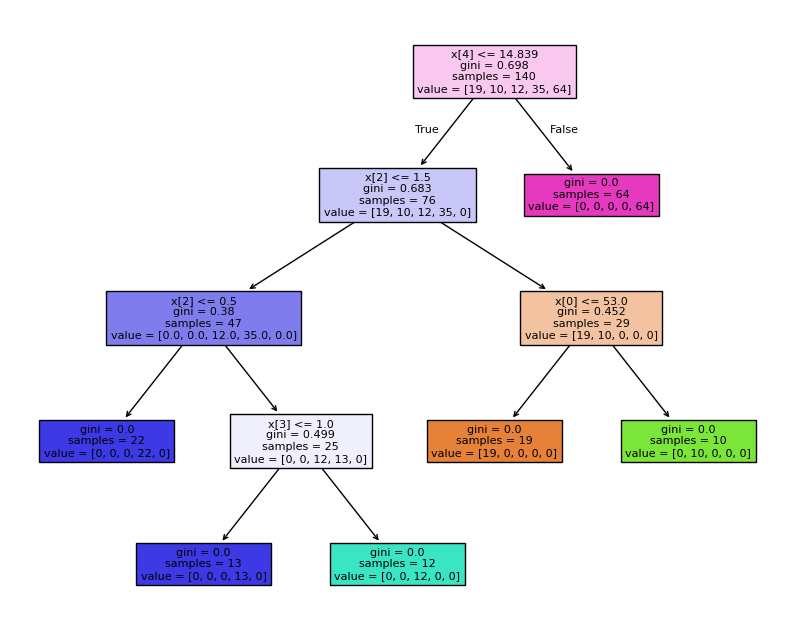

In [349]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import plot_tree


features=df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
target=df['Drug']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=1)

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(y_pred)
plt.figure(figsize=(10,8))
plot_tree(model, filled=True)
plt.show()